# Nigeria-COVID-19-Data-Analysis-Using-Python
Data Scientist Microdegree Capstone Project

# 

# Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.

In [1]:
# Write Your Code Below
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

# A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

# WEBSCRAPING WITH PANDAS

In [3]:
df = pd.read_html('https://covid19.ncdc.gov.ng/')

In [4]:
# Save the data to a DataFrame object.
df_covid19 = pd.DataFrame(df[0])
df_covid19.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,98957,126,98062,769
1,FCT,28501,133,28120,248
2,Rivers,16584,44,16386,154
3,Kaduna,11225,4,11133,88
4,Plateau,10247,2,10170,75


## WEBSITE SCRAP  WITH BEAUTIFULSOUP AND PANDAS

In [5]:
url = "https://covid19.ncdc.gov.ng/"
page = requests.get(url).text
# Creating BeautifulSoup object with the specific parser
soup = BeautifulSoup(page, 'html.parser')

### DEFINE TABLE BY EXTRACTING COLUMN NAMES 

In [6]:
#specify html id attribute

table = soup.find("table", id="custom1")

# select the column_names using for loop, range and lenght function
column_names = table.thead.findAll("tr")
for i in range(len(column_names)):
    data = column_names[i].find_all("th")
    column_names = [t.string.strip() for t in data]
    
print(column_names)

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [7]:
#saving to dataFrame
df_covid = pd.read_html(str(table))[0]
df_covid.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,98957,126,98062,769
1,FCT,28501,133,28120,248
2,Rivers,16584,44,16386,154
3,Kaduna,11225,4,11133,88
4,Plateau,10247,2,10170,75


# B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below.

1. Global Daily Confirmed Cases - Click Here
2. Global Daily Recovered Cases - Click Here
3. Global Daily Death Cases - Click Here

In [8]:
#Global Daily Confirmed Cases

G_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_G_confirmed = pd.read_csv(G_confirmed)
df_G_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/22,3/1/22,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,173659,173879,174073,174214,174214,174331,174582,175000,175353,175525
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,271563,271702,271825,271825,272030,272030,272210,272250,272337,272412
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,264936,265010,265079,265130,265186,265227,265265,265297,265323,265346
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,37999,38165,38249,38342,38434,38434,38434,38620,38710,38794
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,98741,98746,98746,98746,98796,98796,98806,98806,98829,98855


In [9]:
#Global Daily Recovered Cases

G_Dailyrecovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_G_Dailyrecovered = pd.read_csv(G_Dailyrecovered)
df_G_Dailyrecovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/22,3/1/22,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Global Daily Death Cases

G_Dailydeath = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df_G_Dailydeath = pd.read_csv(G_Dailydeath)
df_G_Dailydeath.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/22,3/1/22,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7598,7609,7617,7619,7619,7622,7623,7626,7630,7636
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3469,3472,3474,3474,3478,3478,3482,3483,3483,3483
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6835,6840,6843,6848,6852,6853,6855,6857,6858,6860
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,151,151,151,151,151,151,151,151,152,152
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


# 

# C - External Data
Save the external data to a DataFrame
External Data includes but not limited to: covid_external.csv, Budget data.csv, RealGDP.csv

# Task 2 - View the data
Obtain basic information about the data using the head() and info() method.

In [11]:
#covid_external.csv

covid_external = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv'
df_covid_external= pd.read_csv(covid_external)
df_covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [12]:
df_covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [13]:
#Budget data.csv

budget = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv'
df_budget= pd.read_csv(budget)
df_budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [14]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [15]:
#RealGDP.csv

RealGDP = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv'
df_RealGDP= pd.read_csv(RealGDP)
df_RealGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [16]:
df_RealGDP. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


# 

# Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format.
Examples:

* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data


### TODO A - Clean the scraped data

In [17]:
#find column names

df_covid19.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

In [18]:
#Rename columns

df_covid19.rename(columns={'States Affected': 'Affected States', 
                        'No. of Cases (Lab Confirmed)': 'Cases Confirmed',
                        'No. of Cases (on admission)': 'Cases admitted',
                        'No. Discharged':'Recovered cases',
                        'No. of Deaths':'Death Roll'}, inplace= True)
df_covid19.head()

,Affected States,Cases Confirmed,Cases admitted,Recovered cases,Death Roll
0,Lagos,98957,126,98062,769
1,FCT,28501,133,28120,248
2,Rivers,16584,44,16386,154
3,Kaduna,11225,4,11133,88
4,Plateau,10247,2,10170,75


# 

### TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [19]:
df_G_confirmed.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
df_G_confirmed.rename(columns = {"Country/Region": "Country"}, inplace = True)
nigeria_confirmed = df_G_confirmed[df_G_confirmed["Country"] == "Nigeria"]
nigeria_confirmed

columns = nigeria_confirmed.iloc[:, 4:]

df_nigeria_confirmed = nigeria_confirmed.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nigeria_confirmed["Date"] = df_nigeria_confirmed["Date"].apply(pd.to_datetime, errors='coerce')

df_nigeria_confirmed.head(3)

,Date,Cases
0,2020-01-25,0
1,2020-01-26,0
2,2020-01-27,0


# 

### TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [20]:
df_G_Dailyrecovered.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
df_G_Dailyrecovered.rename(columns = {"Country/Region": "Country"}, inplace = True)
nigeria_recovered = df_G_Dailyrecovered[df_G_Dailyrecovered["Country"] == "Nigeria"]

columns = nigeria_recovered.iloc[:, 4:]

df_nigeria_recovered = nigeria_recovered.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nigeria_recovered["Date"] = df_nigeria_recovered["Date"].apply(pd.to_datetime, errors='coerce')
df_nigeria_recovered.tail(3)

,Date,Cases
772,2022-03-07,0
773,2022-03-08,0
774,2022-03-09,0


### TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [21]:
df_G_Dailydeath.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
df_G_Dailydeath.rename(columns = {"Country/Region": "Country"}, inplace = True)
nigeria_death = df_G_Dailydeath[df_G_Dailydeath["Country"] == "Nigeria"]

columns = nigeria_death.iloc[:, 4:]

df_nigeria_death = nigeria_death.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nigeria_death["Date"] = df_nigeria_death["Date"].apply(pd.to_datetime, errors='coerce')
df_nigeria_death.tail(3)

,Date,Cases
772,2022-03-07,3142
773,2022-03-08,3142
774,2022-03-09,3142


# Task 4 - Analysis
* Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary.
* We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary

### TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test


Text(0.5, 1.0, 'Top 10 states in terms of Confirmed Covid cases by Laboratory test')

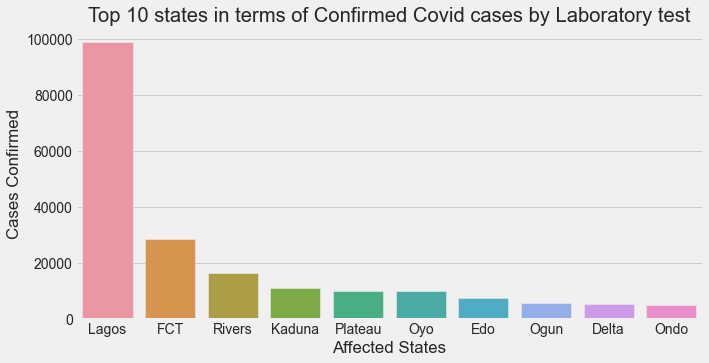

In [22]:
df_covid19_confirm10 = df_covid19.sort_values(by=['Cases Confirmed'], ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x = 'Affected States', y= 'Cases Confirmed', data = df_covid19_confirm10).set_title("Top 10 states in terms of Confirmed Covid cases by Laboratory test")

### TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values


Text(0.5, 1.0, 'Top 10 states in terms of Discharged Covid cases')

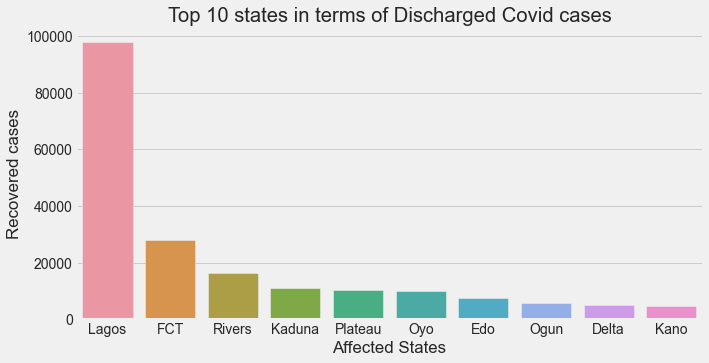

In [23]:
df_covid19_recovered10 = df_covid19.sort_values(by=['Recovered cases'], ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x = 'Affected States', y= 'Recovered cases', data = df_covid19_recovered10).set_title("Top 10 states in terms of Discharged Covid cases")

### TODO D - Plot the top 10 Death cases

Text(0.5, 1.0, 'Top 10 states in terms of Deaths')

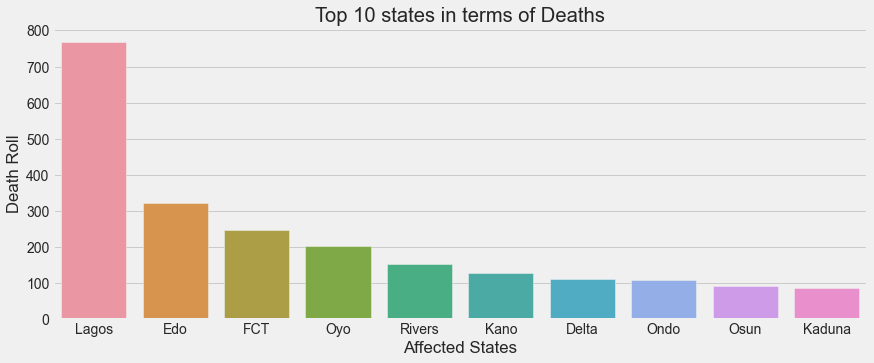

In [24]:
#Top 10 Death cases
df_covid19_death10 = df_covid19.sort_values(by=['Death Roll'], ascending=False).head(10)
plt.figure(figsize=(13,5))
sns.barplot(x = 'Affected States', y= 'Death Roll', data = df_covid19_death10).set_title("Top 10 states in terms of Deaths")

### TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

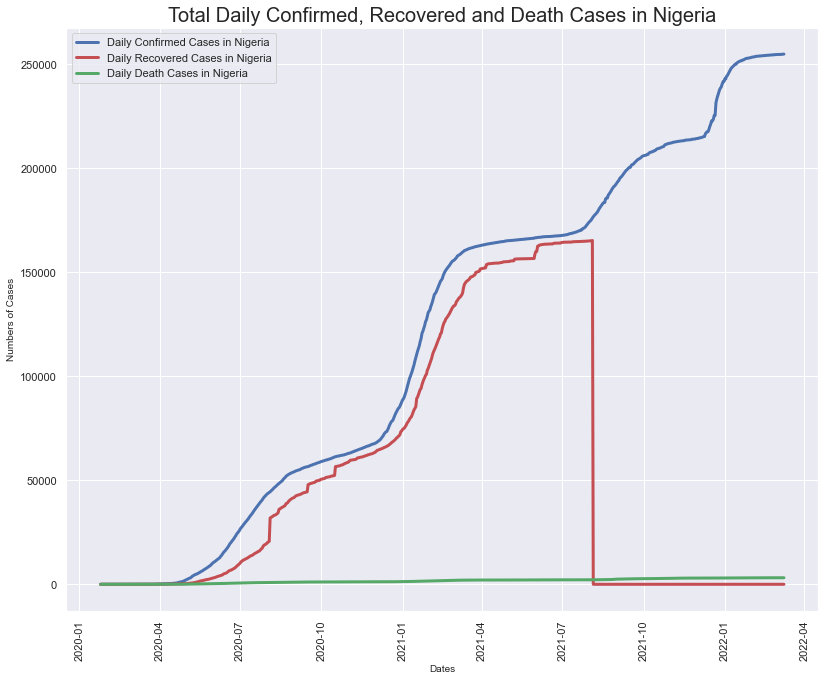

In [25]:
#The total daily confirmed, recovered and death cases in Nigeria
sns.set(rc={'figure.figsize':(12,10)})

sns.lineplot(df_nigeria_confirmed.Date, df_nigeria_confirmed.Cases,linewidth=3, label="Daily Confirmed Cases in Nigeria", color="b", markers="o")

sns.lineplot(df_nigeria_recovered.Date, df_nigeria_recovered.Cases,linewidth=3, label="Daily Recovered Cases in Nigeria", color="r")

sns.lineplot(df_nigeria_death.Date, df_nigeria_death.Cases,linewidth=3, label="Daily Death Cases in Nigeria", color="g")

#Title, labels and legend
plt.xlabel("Dates", fontsize=10)
plt.ylabel("Numbers of Cases", fontsize=10)
plt.xticks(rotation=90)
plt.title ("Total Daily Confirmed, Recovered and Death Cases in Nigeria", fontsize=20)
plt.show()

### TODO F -

* Determine the daily infection rate, you can use the Pandas diff method to find the derivate of the total cases.
* Generate a line plot for the above

Text(0.5, 1.0, 'Daily Infection Rates')

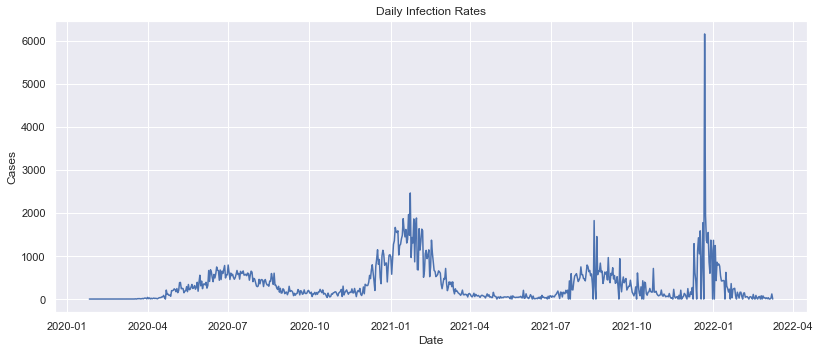

In [26]:
#daily infection rate
df_nigeria_daily_infection_rate = df_nigeria_confirmed.Cases.diff()
plt.figure(figsize=(12,5))
sns.lineplot(df_nigeria_confirmed.Date, df_nigeria_daily_infection_rate).set_title("Daily Infection Rates")


### TODO G -

* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [27]:
df_nigeria_confirmed["Daily Infection Rate"] = df_nigeria_confirmed["Cases"].diff()
max_infection = df_nigeria_confirmed["Daily Infection Rate"].max()
max_infection

6158.0

In [28]:
#Date of maximum infection
max_infection_date = df_nigeria_confirmed.loc[(df_nigeria_confirmed["Daily Infection Rate"] == max_infection), "Date"]
max_infection_date

697   2021-12-22
Name: Date, dtype: datetime64[ns]

### TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. Hint: Check out Pandas nlargest function. This tutorial can help out
* Plot both variable on the same axis. Check out this tutorial

In [29]:
#rename states to affected states 
df_covid_external.rename (columns={'states': 'Affected States' }, inplace = True)
df_covid_external. head()

,Affected States,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [30]:
#view both data set before merging
df1 = df_covid19
df2 = df_covid_external
display(df1, df2)

,Affected States,Cases Confirmed,Cases admitted,Recovered cases,Death Roll
0,Lagos,98957,126,98062,769
1,FCT,28501,133,28120,248
2,Rivers,16584,44,16386,154
3,Kaduna,11225,4,11133,88
4,Plateau,10247,2,10170,75
5,Oyo,10215,75,9938,202
6,Edo,7694,8,7365,321
7,Ogun,5810,11,5717,82
8,Delta,5364,83,5170,111
9,Ondo,5173,315,4749,109


,Affected States,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84
5,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91
6,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87
7,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83
9,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89


In [31]:
#Combine the two dataset together on a common column(states)
df3 = pd.merge(df1, df2)
df3.head(5)

,Affected States,Cases Confirmed,Cases admitted,Recovered cases,Death Roll,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,98957,126,98062,769,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28501,133,28120,248,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,16584,44,16386,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11225,4,11133,88,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10247,2,10170,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


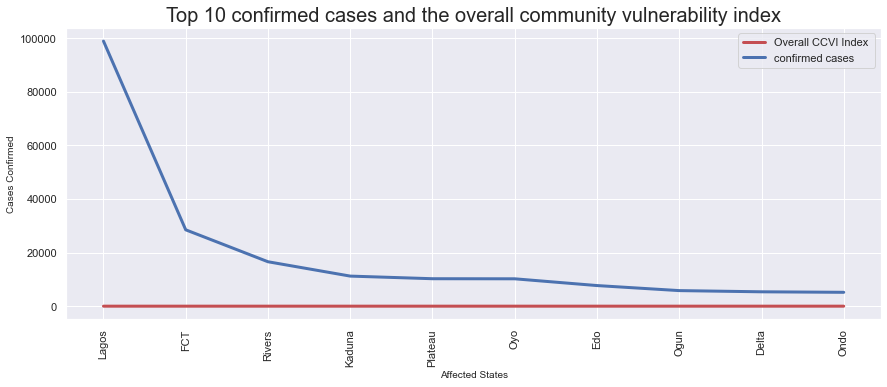

In [32]:
#Pandas nlargest function
Confirmed_index= df3.nlargest(10, 'Cases Confirmed')

#Create a new dataframe for plotting.Plot both variable on the same axis
sns.set(rc={'figure.figsize':(13,5)})
sns.lineplot(Confirmed_index['Affected States'], Confirmed_index ['Overall CCVI Index'], linewidth=3, label="Overall CCVI Index ", color = "r")
sns.lineplot(Confirmed_index['Affected States'], Confirmed_index ['Cases Confirmed'], linewidth=3, label="confirmed cases ", color="b")


#Title, labels and legend

plt.xlabel("Affected States", fontsize=10)
plt.ylabel("Cases Confirmed", fontsize=10)
plt.xticks(rotation=90)
plt.title ("Top 10 confirmed cases and the overall community vulnerability index", fontsize=20)
plt.show()

### TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset.

* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density. Hint: Check out Seaborn Regression Plot.
* Provide a summary of your observation


In [33]:
#Generate a regression plot between two variables to visualize the linear relationships
density = df3. sort_values (by=['Cases Confirmed'], ascending=False).head(10)

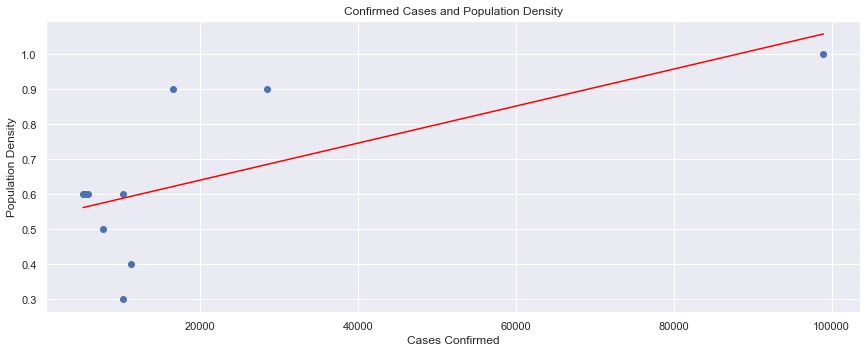

In [34]:
from sklearn.linear_model import LinearRegression
# iloc[:, 1] is the column of X
X = density.iloc[:, 1].values.reshape(-1, 1)

 # df.iloc[:, 12] is the column of Y
Y = density.iloc[:, 12].values.reshape(-1, 1) 
 
#linear relationships
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Confirmed Cases and Population Density")
plt.xlabel("Cases Confirmed")
plt.ylabel("Population Density")
plt.show()

##  A summary of Seaborn Regression Plot observation above.
* The population is rising: this shows human population growth.
* The confirmed cases of covid_19 is also increasing. 
* One would say that the confirmed cases of covid_19 may affect the human population, this is because confirmed cases have risen above the current population density. 


### TODO J -

* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings.
Note that you can have as many as possible.



In [37]:
Confirmed_Other= df3.nlargest(10, 'Cases Confirmed')

<AxesSubplot:xlabel='Socio-Economic', ylabel='Cases Confirmed'>

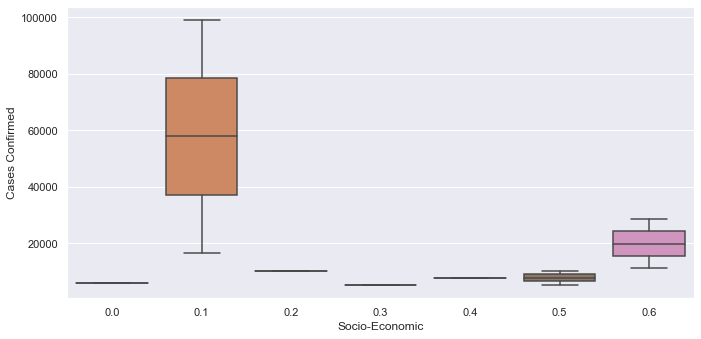

In [38]:
#boxplot Relationship between Socio-Economic and Cases Confirmed
sns.set(rc={'figure.figsize':(10, 5)})
sns.boxplot( 'Socio-Economic', 'Cases Confirmed', data=Confirmed_Other)

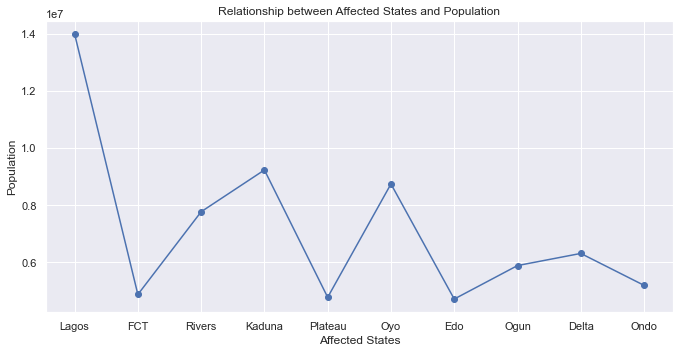

In [39]:
#Relationship between Affected States and Population
plt.plot('Affected States', 'Population', data=Confirmed_Other, linestyle='-', marker='o')
plt.title("Relationship between Affected States and Population")
plt.xlabel("Affected States")
plt.ylabel("Population")
plt.show()

# 

### TODO L -
==========

* Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)

Steps
------------
* From the Real GDP Data, generate a barplot using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
Hint: Use Pandas.melt to create your plot DataFrame
* Set your quarter legend to lower left.
* Using axhline, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation



In [40]:
#view RealGDP data
df_RealGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [41]:
#From the Real GDP Data, generate a barplot using the GDP values for each year & quarters.
RealGDP_num = df_RealGDP[['Year', 'Q1', 'Q2', 'Q3', 'Q4']].set_index('Year')

RealGDP_quater1 = RealGDP_num.loc[2014]
RealGDP_quater2 = RealGDP_num.loc[2015]
RealGDP_quater3 = RealGDP_num.loc[2016]
RealGDP_quater4 = RealGDP_num.loc[2017]
RealGDP_quater5 = RealGDP_num.loc[2018]
RealGDP_quater6 = RealGDP_num.loc[2019]
RealGDP_quater7 = RealGDP_num.loc[2020]

Text(0.5, 1.0, '2020')

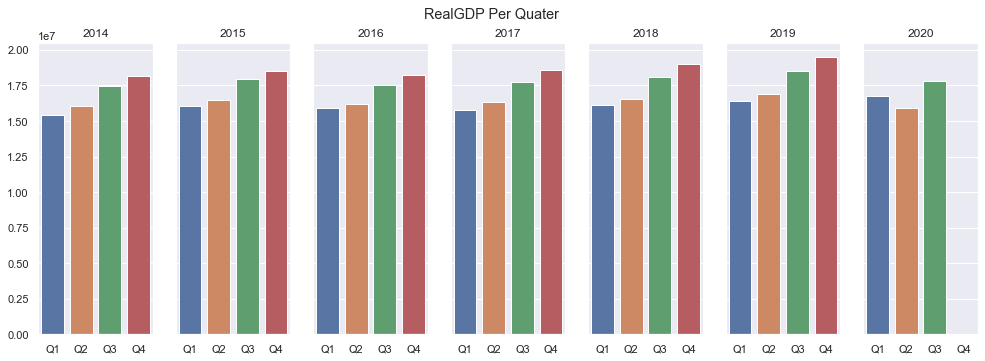

In [42]:
#plot barplot to vizualize the GDP values for each year & quarters.
fig, axes = plt.subplots(1, 7, figsize=(15, 5), sharey=True)
fig.suptitle('RealGDP Per Quater')

# 2014
sns.barplot(ax=axes[0], x=RealGDP_quater1.index, y=RealGDP_quater1.values)
axes[0].set_title(RealGDP_quater1.name)

# 2015
sns.barplot(ax=axes[1], x=RealGDP_quater2.index, y=RealGDP_quater2.values)
axes[1].set_title(RealGDP_quater2.name)

# 2016
sns.barplot(ax=axes[2], x=RealGDP_quater3.index, y=RealGDP_quater3.values)
axes[2].set_title(RealGDP_quater3.name)

# 2017
sns.barplot(ax=axes[3], x=RealGDP_quater4.index, y=RealGDP_quater4.values)
axes[3].set_title(RealGDP_quater4.name)

# 2018
sns.barplot(ax=axes[4], x=RealGDP_quater5.index, y=RealGDP_quater5.values)
axes[4].set_title(RealGDP_quater5.name)

# 2019
sns.barplot(ax=axes[5], x=RealGDP_quater6.index, y=RealGDP_quater6.values)
axes[5].set_title(RealGDP_quater6.name)

# 2020
sns.barplot(ax=axes[6], x=RealGDP_quater7.index, y=RealGDP_quater7.values)
axes[6].set_title(RealGDP_quater7.name)

In [43]:
#Use Pandas.melt to create your plot DataFrame
df_GDP=pd.melt(df_RealGDP, id_vars =['Year'], value_vars =["Q1", "Q2", "Q3", "Q4"])
df_GDP.head(7)

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00


[Text(0.5, 1.0, 'RealGDP Per Quater')]

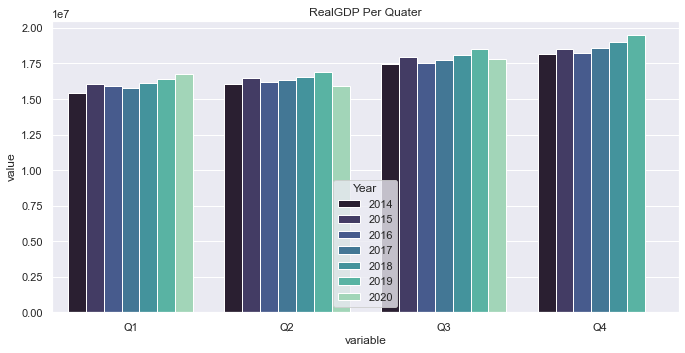

In [44]:
#using melt data to plot sns barplot
sns.barplot( data=df_GDP, x='variable', y='value', hue='Year', palette = 'mako') .set(title= "RealGDP Per Quater")

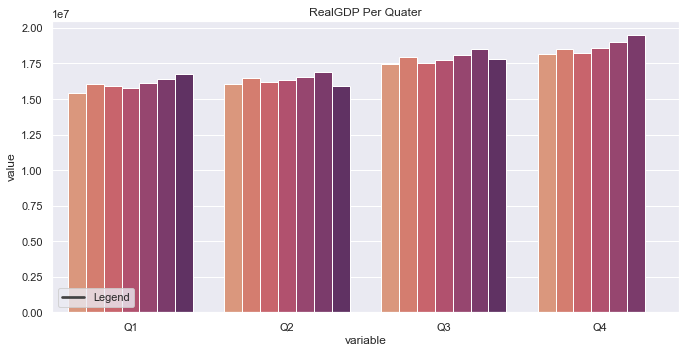

In [45]:
#Set your quarter legend to lower left.
sns.barplot(data=df_GDP, x='variable', y='value',hue = 'Year', palette = "flare") .set(title= "RealGDP Per Quater")
plt.legend(['Legend'], loc='lower left')

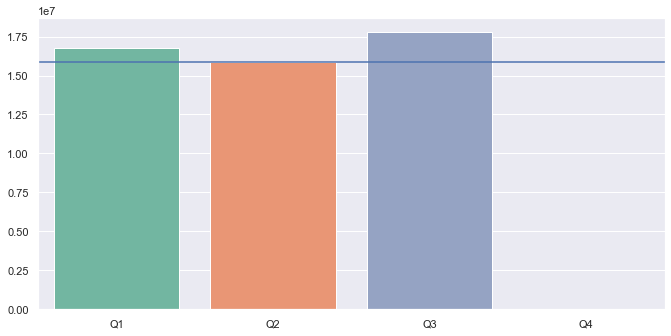

In [46]:
#Using axhline, draw a horizontal line through the graph at the value of Q2 2020.
graph = sns.barplot( x=RealGDP_quater7.index, y=RealGDP_quater7.values, palette = "Set2")
graph.axhline(15838679.70)

### Observation of the Ecomomic impact of covid_19
* The Q2 of the 2020 RealGDP has the lowest records of economic impacts in 2020 compared to the Q1 and Q3 
* From the recored above Year 2020 has no records on the Q4
* The highest economic impact was on the Q3.
* The Q1 of 2020 was the highest in all the years before.

### Thank You